# Red Wine Quality

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attributes

Inspiration

Using machine learning to determine which physiochemical properties make a wine 'good'!

# Objectives

The objectives of this project are as follows:

1-To experiment with different classification methods to see which yields the highest accuracy


2-To determine which features are the most indicative of a good quality wine


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

The data contains 1599 rows and 12 columns

In [4]:
#checking null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since there are are no null values we can proceed with Data analysis

In [5]:
#checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All values are in float type and target value in integer type. We are good to go.

# Checking distribution

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

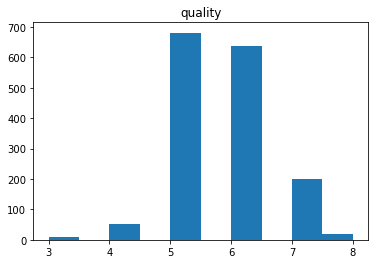

In [7]:
df["quality"].hist(grid=False)
plt.title("quality")
plt.show()

Above graph shows that the target variables have different distribution. Most of the Wine quality is in 5 and 6. But we have the problem that the quality of below 7 is considered as bad quality, and 7 and higher is of good quality. We will not do SMOTE analysis here since we have to convert the target values to binary before we do classification techniques.

# Splitting the target to Good and Bad

In [8]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable

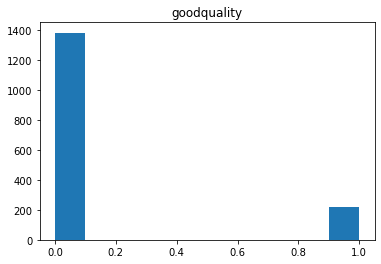

In [9]:
df["goodquality"].hist(grid=False)
plt.title("goodquality")
plt.show()

<AxesSubplot:xlabel='volatile acidity', ylabel='goodquality'>

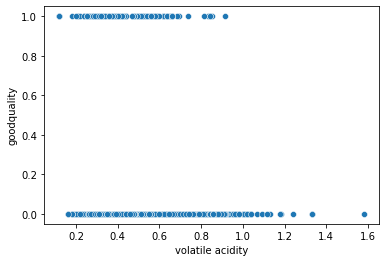

In [10]:
sns.scatterplot(x='volatile acidity',y='goodquality',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='goodquality'>

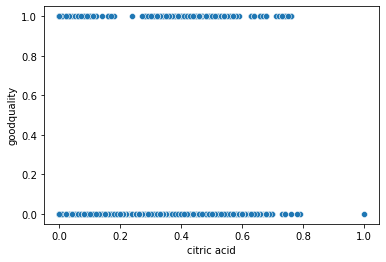

In [11]:
sns.scatterplot(x='citric acid',y='goodquality',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='goodquality'>

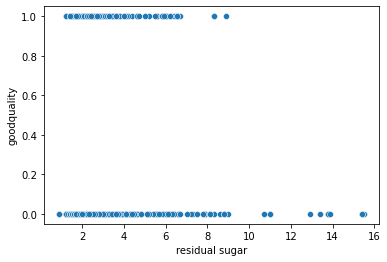

In [12]:
sns.scatterplot(x='residual sugar',y='goodquality',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='goodquality'>

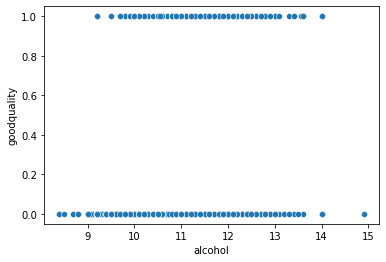

In [13]:
sns.scatterplot(x='alcohol',y='goodquality',data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='goodquality'>

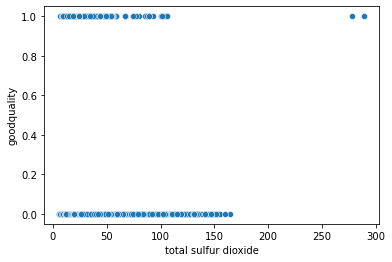

In [14]:
sns.scatterplot(x='total sulfur dioxide',y='goodquality',data=df)

<AxesSubplot:xlabel='density', ylabel='goodquality'>

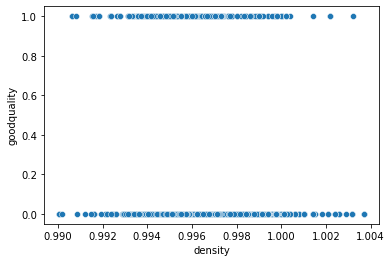

In [15]:
sns.scatterplot(x='density',y='goodquality',data=df)

In all the above figures we can see the didtribution of variables along with target.

<AxesSubplot:xlabel='sulphates', ylabel='goodquality'>

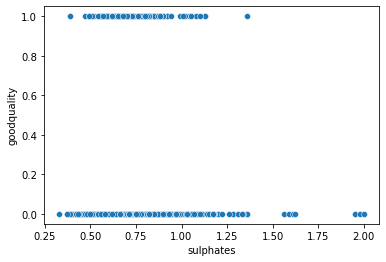

In [16]:
sns.scatterplot(x='sulphates',y='goodquality',data=df)

<AxesSubplot:xlabel='pH', ylabel='goodquality'>

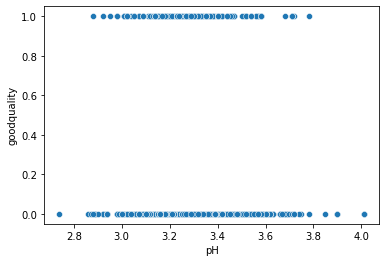

In [17]:
sns.scatterplot(x='pH',y='goodquality',data=df)

# Describing the data

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


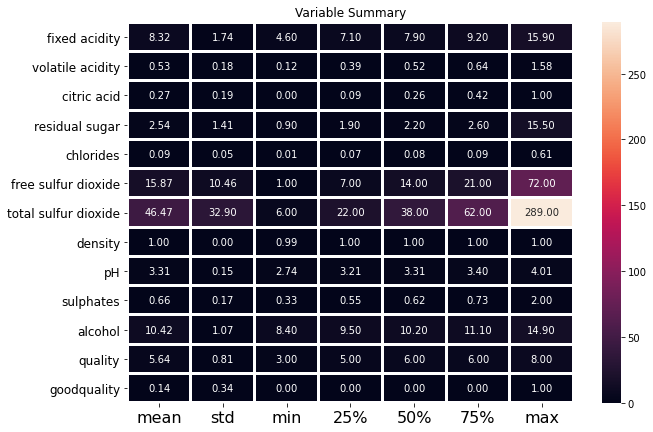

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

We can use Scaling before using classification, since we have different values in total sulfur dioxide. In the meantime we will find Correlation,skewnessoutliers as well and treat them accordingly.

# Correlation

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


<AxesSubplot:>

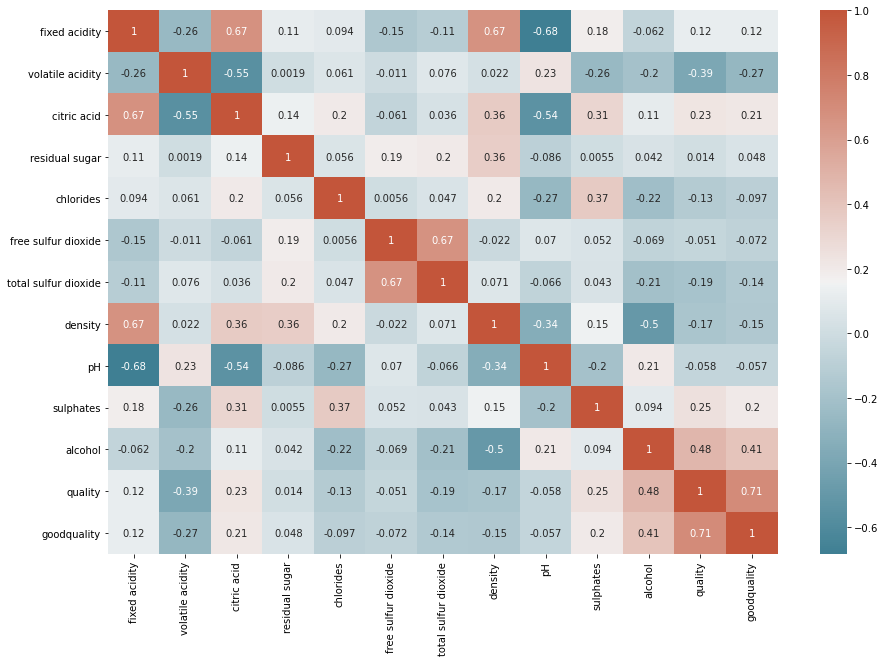

In [21]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The max correlation value is 48% for the independent variable "alcohol" with "quality". 
Next comes "sulphates" which is 25% correlated with "quality".
The least correlation is with "volatile acidity" which is -39%.
"citric acid" and "quality" has a correlation of 23%.
"fixed acidity" and "residual sugar" are also positively corelated and rest all are negatively corelated.

We can also figure out that, "citric acid" and "density" is highly correlated with "fixed acidity" which is at 67%.
 Also free sulphur dioxide and total sulphur dioxide are correlated at 67% to each other.

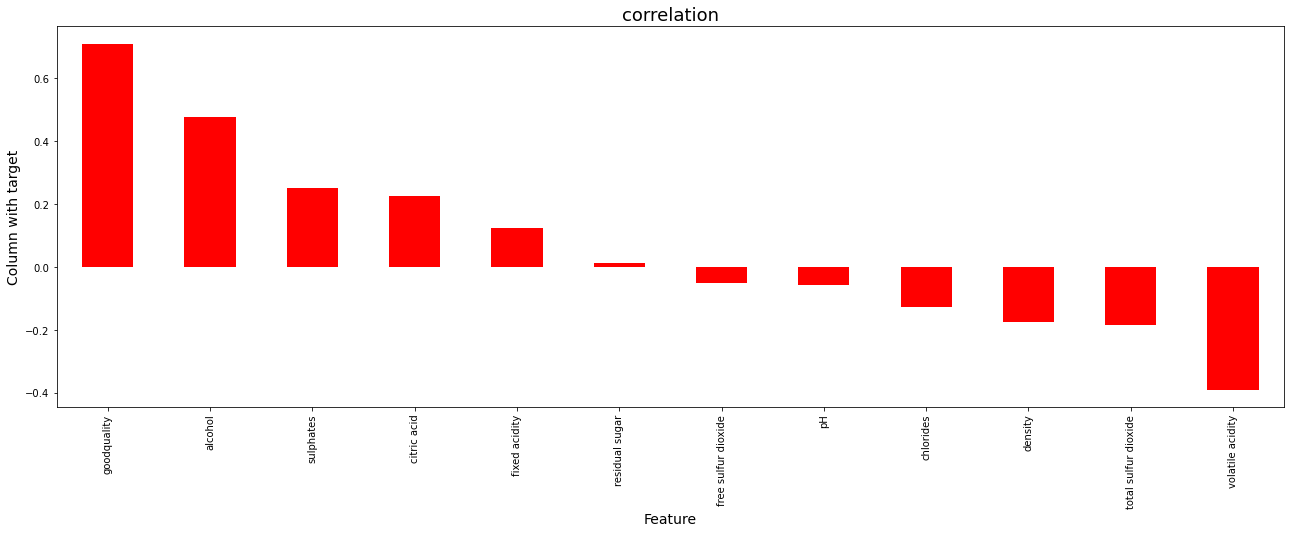

In [22]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

alcohol, sulphates, citric acid, fixed acidity, residual sugar are in positive side and free sulphur oxide, pH, chlorides, density, total sulphur oxide and volatile acidity are on the negative side.

# Checking Outliers

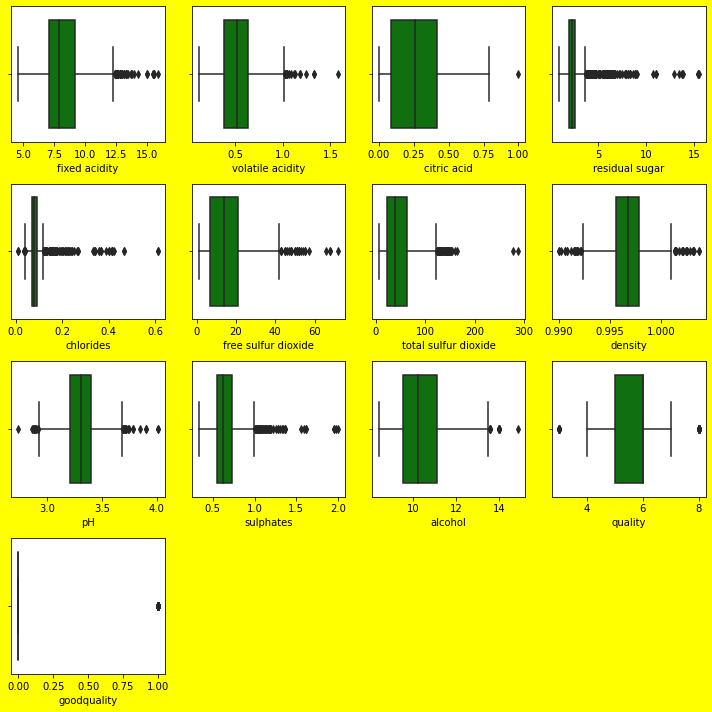

In [23]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in df:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='v')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

As we can see from above graph that there are many outliers present in each columns. We have many outliers in "residual sugar", "free sulfur oxide", "chlorides" and "sulphates". All the columns have outliers in the given data.

# Checking Skewness

In [24]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
goodquality             2.129363
dtype: float64

<AxesSubplot:xlabel='pH', ylabel='Density'>

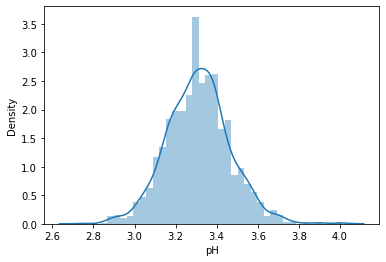

In [25]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

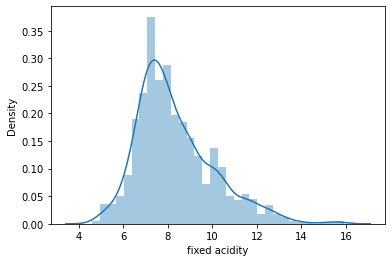

In [26]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

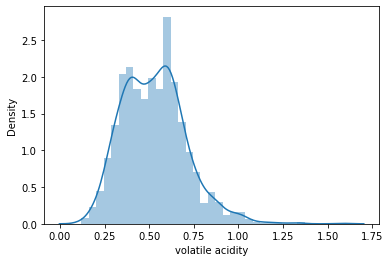

In [27]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

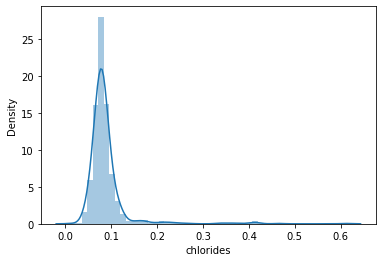

In [28]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

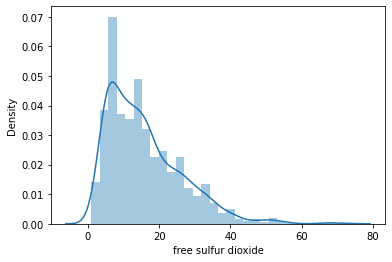

In [29]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

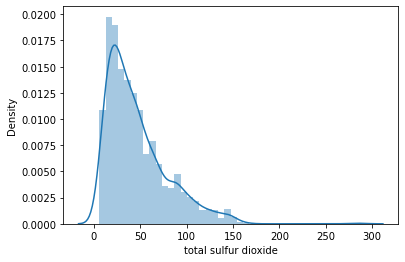

In [30]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

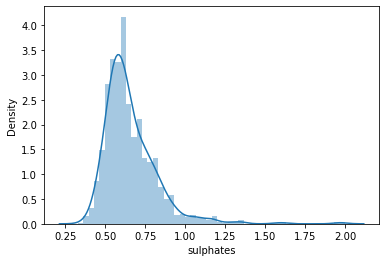

In [31]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

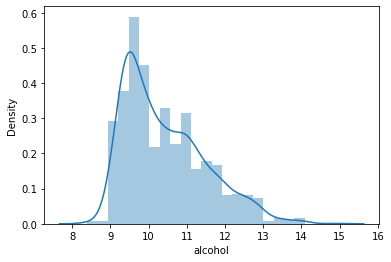

In [32]:
sns.distplot(df['alcohol'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

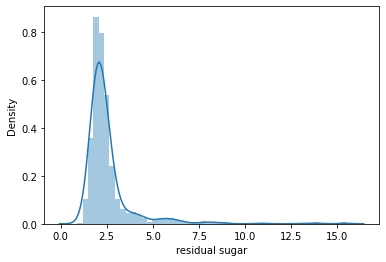

In [33]:
sns.distplot(df['residual sugar'])

From the above graphs, we can see that 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur diode', 'sulphates', 'alcohol' are not normalised. Hence we have to normalise the data.

# VIF Factor or multicollinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
x=df.iloc[:,:-2]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [36]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [37]:
vif_calc()

     VIF Factor              features
0     74.452265         fixed acidity
1     17.060026      volatile acidity
2      9.183495           citric acid
3      4.662992        residual sugar
4      6.554877             chlorides
5      6.442682   free sulfur dioxide
6      6.519699  total sulfur dioxide
7   1479.287209               density
8   1070.967685                    pH
9     21.590621             sulphates
10   124.394866               alcohol


From the above figure, we can see that the multicolinearity among the variables-density and pH is very high. We have to remove variables to reduce the VIF factor. 

# Data Cleaning

# Dropping pH to reduce Multicollinearity

In [38]:
#dropping the column pH to balance the VIF, 
#Also pH has less correlation with target-0.057731
#pH has outliers

df=df.drop(["pH"],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5,0


In [39]:
x=df.iloc[:,:-2]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


In [40]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [41]:
vif_calc()

   VIF Factor              features
0   51.643230         fixed acidity
1   16.823738      volatile acidity
2    9.172773           citric acid
3    4.662973        residual sugar
4    6.234407             chlorides
5    6.363828   free sulfur dioxide
6    6.295132  total sulfur dioxide
7  218.274978               density
8   21.588890             sulphates
9  119.969257               alcohol


The Vif factor is reduced 

# Removing Outliers

In [42]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape

(1599, 12)

In [43]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
        120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
        391,  396,  396,  400,  400,  442,  442,  451,  459,  467,  480,
        480,  494,  515,  517,  544,  554,  554,  555,  555,  557,  557,
        568,  584,  588,  591,  595,  608,  614,  636,  639,  649,  649,
        651,  652,  652,  652,  672,  672,  684,  690,  690,  692,  692,
        723,  724,  730,  754,  776,  777,  795,  821,  832,  836,  837,
        889,  899,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043,
       1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [44]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1458, 12)


In [45]:
losspercent=(1599-1458)/1599*100
losspercent

8.818011257035648

In [46]:
x=df_new.iloc[:,0:-2]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


# Removing Skewness

In [47]:
#transforming to remove skewness

from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

In [48]:
x

array([[-0.455735  ,  1.05464714, -1.52042204, ...,  0.64363409,
        -0.58965433, -1.1228726 ],
       [-0.1673149 ,  1.92108502, -1.52042204, ...,  0.06734326,
         0.45405039, -0.53658102],
       [-0.1673149 ,  1.35670715, -1.24054148, ...,  0.18291438,
         0.22208658, -0.53658102],
       ...,
       [-1.39478858, -0.00558966, -0.6603272 , ..., -0.54780919,
         0.93363783,  0.73022923],
       [-1.80288819,  0.76483573, -0.72169504, ..., -0.7052075 ,
         0.66952795, -0.04322302],
       [-1.69691005, -1.33597062,  1.07494112, ..., -0.69353847,
         0.30133456,  0.73022923]])

# Standardising the data

The data is not standardised, It’s important to standardize your data in order to equalize the range of the data.

In [49]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [50]:
X

array([[-0.455735  ,  1.05464714, -1.52042204, ...,  0.6436341 ,
        -0.58965433, -1.1228726 ],
       [-0.1673149 ,  1.92108502, -1.52042204, ...,  0.06734326,
         0.45405039, -0.53658102],
       [-0.1673149 ,  1.35670715, -1.24054148, ...,  0.18291438,
         0.22208658, -0.53658102],
       ...,
       [-1.39478858, -0.00558966, -0.6603272 , ..., -0.54780919,
         0.93363783,  0.73022923],
       [-1.80288819,  0.76483573, -0.72169504, ..., -0.7052075 ,
         0.66952795, -0.04322302],
       [-1.69691005, -1.33597062,  1.07494112, ..., -0.69353847,
         0.30133456,  0.73022923]])

In [51]:
X.shape

(1458, 10)

In [52]:
y=df_new.iloc[:,-1]

In [53]:
y.shape

(1458,)

# Modelling the Data

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.22, random_state=45)

In [56]:
X_train.shape

(1137, 10)

In [57]:
X_test.shape

(321, 10)

In [58]:
y_train.shape

(1137,)

In [59]:
y_test.shape

(321,)

In [60]:
lr=LogisticRegression()

In [61]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
prediclr=lr.predict(X_test)

In [62]:
print(accuracy_score(y_test,prediclr))
print(confusion_matrix(y_test,prediclr))
print(classification_report(y_test,prediclr))

0.8847352024922118
[[268   6]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       274
           1       0.73      0.34      0.46        47

    accuracy                           0.88       321
   macro avg       0.81      0.66      0.70       321
weighted avg       0.87      0.88      0.87       321



In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88013699 0.85273973 0.88356164 0.8556701  0.87972509]
0.8703667090335641
0.013295447312310539


In [64]:
dtc= DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=7)

gd_sr.fit(X,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'criterion': 'entropy'}
0.8408335085966664


In [65]:
dtcG=DecisionTreeClassifier(criterion='gini')
dtcG.fit(X,y)
prd=dtcG.predict(X_test)
print('Accuracy ::',accuracy_score(y_test,prd))
confusion_matrix(y_test,prd)

Accuracy :: 1.0


array([[274,   0],
       [  0,  47]])

In [66]:
print(accuracy_score(y_test,prd))
print(confusion_matrix(y_test,prd))
print(classification_report(y_test,prd))

1.0
[[274   0]
 [  0  47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       1.00      1.00      1.00        47

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321



# Cross Validating

In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtcG,X,y,cv=20)
print(score)
print(score.mean())
print(score.std())

[0.91780822 0.8630137  0.89041096 0.87671233 0.89041096 0.84931507
 0.78082192 0.90410959 0.90410959 0.84931507 0.87671233 0.67123288
 0.83561644 0.78082192 0.79452055 0.90410959 0.89041096 0.7260274
 0.86111111 0.83333333]
0.8449961948249619
0.06323031721227017


# Hence for Decision Tree classification we have accuracy score of 100% and CV score of 90%

# AUC ROC CURVE

In [68]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [69]:
y_pred_prob=dtcG.predict_proba(X_test)[:,1]

In [70]:
y_pred_prob

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [72]:
fpr

array([0., 0., 1.])

In [73]:
tpr

array([0., 1., 1.])

In [74]:
thresholds

array([2., 1., 0.])

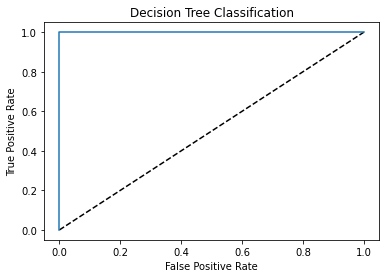

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classification')
plt.show()

In [76]:
auc_score=roc_auc_score(y_test,dtcG.predict(X_test))

In [77]:
auc_score

1.0

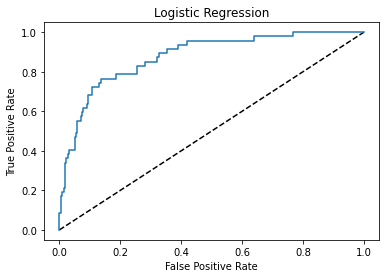

In [78]:
#logistic curve

y_pred_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [79]:
auc_score=roc_auc_score(y_test,lr.predict(X_test))

In [80]:
auc_score

0.6592638608479577

# Ensembling Techniques

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9003115264797508
[[271   3]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       274
           1       0.86      0.38      0.53        47

    accuracy                           0.90       321
   macro avg       0.88      0.69      0.74       321
weighted avg       0.90      0.90      0.88       321



In [82]:
score=cross_val_score(rf,X,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.89726027 0.89041096 0.88356164 0.89726027 0.90410959 0.86986301
 0.84246575 0.89041096 0.87586207 0.88965517]
0.8840859707132734
0.016916084814485685


# Here, rf score and cv score are almost similar. This can be considered best model as well

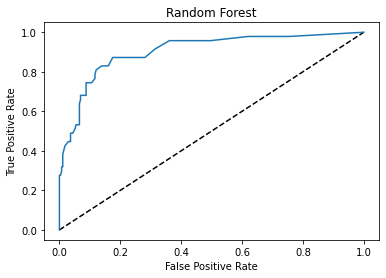

In [83]:
#auv-roc curve for Random Forest

y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show()

In [84]:
auc_score=roc_auc_score(y_test,rf.predict(X_test))
auc_score

0.6860149091473831

In [85]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=dtc(),n_estimators=50,learning rate=1.0(default)

ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8660436137071651
[[263  11]
 [ 32  15]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       274
           1       0.58      0.32      0.41        47

    accuracy                           0.87       321
   macro avg       0.73      0.64      0.67       321
weighted avg       0.85      0.87      0.85       321



In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8847352024922118
[[269   5]
 [ 32  15]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       274
           1       0.75      0.32      0.45        47

    accuracy                           0.88       321
   macro avg       0.82      0.65      0.69       321
weighted avg       0.87      0.88      0.86       321



# Saving the Best Model

In [87]:
import joblib

joblib.dump(dtcG,'dtcfileRW.obj')    #save the best model when dtcG=.22

dtc_from_joblib=joblib.load('dtcfileRW.obj')    #load the model

dtc_from_joblib.predict(X_test)   #to make predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [88]:
import pickle

filename='pickledtcfileRW.pkl'
pickle.dump(dtcG,open(filename,'wb'))

loaded_model= pickle.load(open(filename,'rb'))

loaded_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Important Feature

In [89]:
a=df_new.iloc[:,0:-2]
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


<AxesSubplot:>

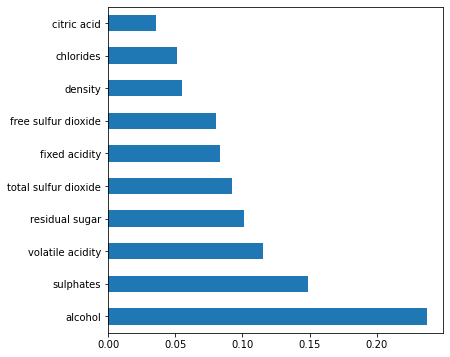

In [90]:
feat_importances = pd.Series(dtcG.feature_importances_, index=a.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

According to dtc model, important feature is alcohol followed by sulphates and volatile acidity. Least important are citric acid and density and chlorides.

<AxesSubplot:>

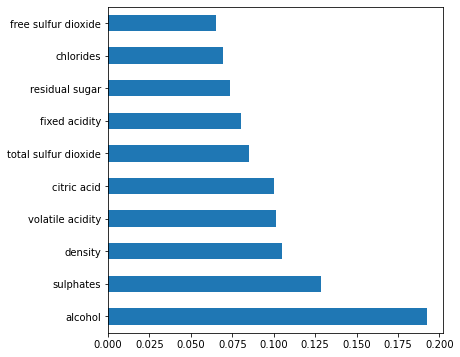

In [91]:
feat_importances = pd.Series(rf.feature_importances_, index=a.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

In RF model also the most important is Alcohol followed by sulphates. But the the 3rd most important is the 2nd least important in dtc model.

Hence we can conclude that the most important feature determining the quality of Red Wine is Alcohol and also sulphates present in the Wine.